# Example

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

### Linear SVM

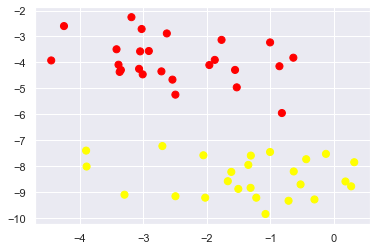

In [3]:
from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=50, centers=2, cluster_std=1)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap="autumn")
# X[:,0] : PYTHON에서는 첫번째 열의 index가 0이라서 이렇게 표현 

In [4]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10) 
# 이때의 C는, hard margin (no error) svm에 대한 slack variable 가중치  
model.fit(X,y)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [6]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """ Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none')
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

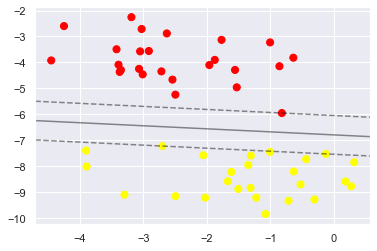

In [7]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [12]:
model.support_vectors_

array([[-0.81600426, -5.95320261],
       [-0.12116415, -7.52836984],
       [-2.69956363, -7.22677839]])

### Kernel SVM

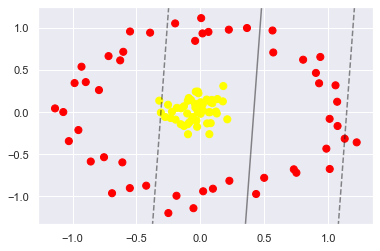

In [13]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [14]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

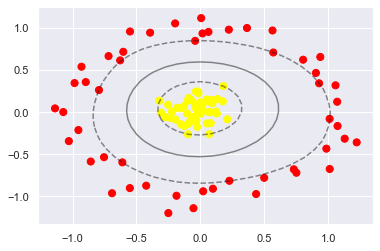

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

# HW1

### Linear SVM 

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [47]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # 1-2번째 열 
# we only take the first two features. 
# We could avoid this ugly slicing by using a two-dim dataset
y = iris.target

In [48]:
# we create an instance of SVM and fit out data. 
#We do not scale our data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1).fit(X, y)

# 사실상 linear kernel 에서는 gamma가 아무런 영향을 못 미침 


In [49]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

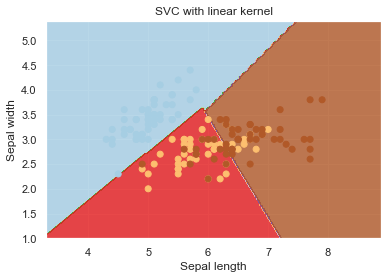

In [50]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)


plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

### SVM RBF kernel

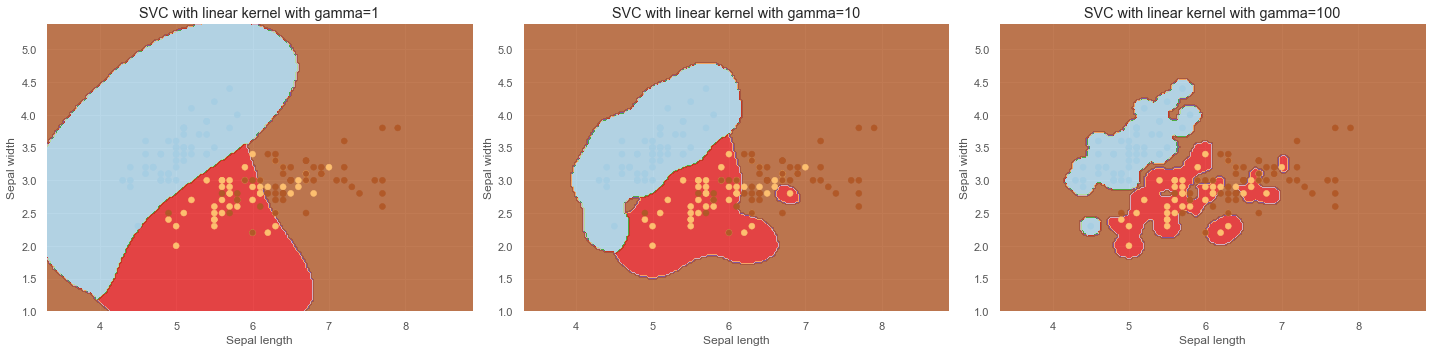

In [69]:
plt.style.use('ggplot')
plt.figure(figsize=(20,5))

plt.subplot(131)
svc1 = svm.SVC(kernel='rbf', C=1,gamma=1).fit(X, y)
# 감마는 0보다 커야함 


Z1 = svc1.predict(np.c_[xx.ravel(), yy.ravel()])
Z1 = Z1.reshape(xx.shape)
plt.contourf(xx, yy, Z1, cmap=plt.cm.Paired, alpha=0.8)


plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with RBF kernel with gamma=1')




plt.subplot(132)
svc2 = svm.SVC(kernel='rbf', C=1,gamma=10).fit(X, y)


Z2 = svc2.predict(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2.reshape(xx.shape)
plt.contourf(xx, yy, Z2, cmap=plt.cm.Paired, alpha=0.8)


plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with RBF kernel with gamma=10')


plt.subplot(133)
svc3 = svm.SVC(kernel='rbf', C=1,gamma=100).fit(X, y)


Z3 = svc3.predict(np.c_[xx.ravel(), yy.ravel()])
Z3 = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z3, cmap=plt.cm.Paired, alpha=0.8)


plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with RBF kernel with gamma=100')


plt.tight_layout()
plt.show()

gamma값이 커질수록 classifier 영역은 좁아지고 굴곡도 더 심해짐 
RBF에서는 정규분포에서 분산의 역수 정도로 생각할 수 있음. 

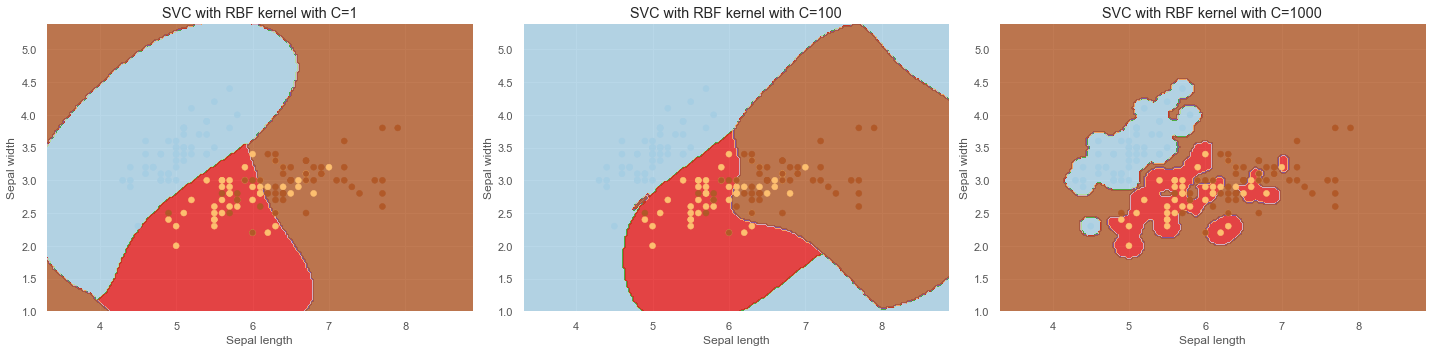

In [71]:
plt.figure(figsize=(20,5))

plt.subplot(131)
svc1 = svm.SVC(kernel='rbf', C=1,gamma=1).fit(X, y)
# 감마는 0보다 커야함 


Z1 = svc1.predict(np.c_[xx.ravel(), yy.ravel()])
Z1 = Z1.reshape(xx.shape)
plt.contourf(xx, yy, Z1, cmap=plt.cm.Paired, alpha=0.8)


plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with RBF kernel with C=1')




plt.subplot(132)
svc2 = svm.SVC(kernel='rbf', C=100,gamma=1).fit(X, y)


Z2 = svc2.predict(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2.reshape(xx.shape)
plt.contourf(xx, yy, Z2, cmap=plt.cm.Paired, alpha=0.8)


plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with RBF kernel with C=100')


plt.subplot(133)
svc3 = svm.SVC(kernel='rbf', C=1000,gamma=1).fit(X, y)


Z3 = svc3.predict(np.c_[xx.ravel(), yy.ravel()])
Z3 = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z3, cmap=plt.cm.Paired, alpha=0.8)


plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with RBF kernel with C=1000')


plt.tight_layout()
plt.show()

C가 커질수록 training error의 허용정도를 나타내는 slack variable가 작아짐
--> 그만큼 오분류되지않게 모두 포함하게되므로 overfit한 형태로 나타남 

# HW 2

## Imbalanced Classification Dataset

In [98]:
from sklearn.datasets import make_classification
from collections import Counter
import numpy as np
from matplotlib import pyplot as plt

from numpy import mean

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

Counter({0: 9900, 1: 100})


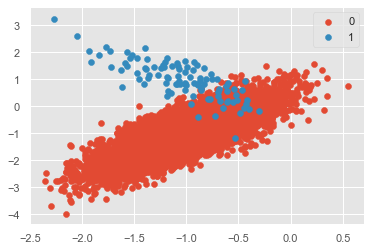

In [87]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)
# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [95]:
# 위 코드랑 합쳐서, 간단하게 나타낸 결과 
# fit a svm on an imbalanced classification dataset

# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)
# define model
model = SVC(gamma='scale')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.808


SVM은 2분류에는 효과적이지만, 위와 같이 imbalanced 분류에서는 유용하지 못함

## Weighted SVM with Scikit-Learn

training dataset에 있는 class 분포의 역수를 사용하는 것이 가장 일반적. 

In [ ]:
# define model
weights = {0:1.0, 1:1.0}
model = SVC(gamma='scale', class_weight=weights)

위 코드는 class 0, 1각각에 1:1의 비율 부여 (가중치 동일)

In [ ]:
# define model
weights = {0:1.0, 1:100.0}  
model = SVC(gamma='scale', class_weight=weights)

위 코드는 test dataset이 1:100의 비율로 class가 나뉜 경우에 적용할 수 있는 예시
1:100의 비율에 역수를 취해서, minority에는 100, majority에는 1을 적용시킬 수 있음.

아래코드는 바로 위 코드와 비율은 동일하지만 배수가 다를 뿐. 

In [ ]:
# define model
weights = {0:0.01, 1:1.0}
model = SVC(gamma='scale', class_weight=weights)

In [ ]:
# define model
model = SVC(gamma='scale', class_weight='balanced')

위 코드는 'heuristic (specified using a general best practice)'한 방법으로 가중치 부여 -> 역시나 비율의 역수 사용 
 

In [96]:
# svm with class weight on an imbalanced classification dataset

# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)
# define model
model = SVC(gamma='scale', class_weight='balanced')

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.967


  가중치를 부여하지 않은, 위에서 다룬 SVM의 ROC AUC 값인 0.804와 비교해봤을때, 더 좋은 점수가 나옴 

## Grid Search Weighted SVM

In [ ]:
# grid search class weights with svm for imbalance classification

# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)
# define model
model = SVC(gamma='scale')

# define grid
balance = [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}]
param_grid = dict(class_weight=balance)

| Class 0 | Class 1 |
| --- | --- | 
| 100 | 1 |
|  10 | 1 |
|  1 |  1 |
|  1 | 10 |
|  1| 100 |

비교하기 위해서! grid search

In [99]:
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, 
                    cv=cv, scoring='roc_auc')

# execute the grid search
grid_result = grid.fit(X, y)

# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.967747 using {'class_weight': {0: 1, 1: 100}}
0.742960 (0.149857) with: {'class_weight': {0: 100, 1: 1}}
0.748404 (0.149873) with: {'class_weight': {0: 10, 1: 1}}
0.807960 (0.126354) with: {'class_weight': {0: 1, 1: 1}}
0.934401 (0.065202) with: {'class_weight': {0: 1, 1: 10}}
0.967747 (0.038637) with: {'class_weight': {0: 1, 1: 100}}


그 결과 1:100 = majority : minority 의 가중치를 부여한 경우, ROC가 가장 좋다.
위에서 다뤘던 general heuristic이 역시나 좋다는 걸 보여준다. 